In [1]:
import pyarrow.feather as feather
import pandas as pd
# 设置 Pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)       # 设置显示宽度，防止换行
pd.set_option('display.max_rows', 20)      # 只显示 20 行数据（可根据需要调整）
# 文件路径
file_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full.feather"
# 读取 feather 文件
data = feather.read_table(file_path)
# 转换为 pandas DataFrame
df = data.to_pandas()
# 打印数据框
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94002, 94003]  [785.59, 682.6, 425.4, 410.71, 038.9, 584.9, 4...   
1               4  185777           Report  admission date discharge date date of birth se...                [99233, 99223, 99238, 99231, 99232]  [E931.7, 799.4, 041.11, 136.3, 571.5, 790.7, 2...   
2               6  107064           Report  admission date discharge date date of birth se...         [99239, 99255, 99291, 99233, 99231, 99232]  [403.91, 276.6, 444.0, V15.82, 997.2, 276.7, 2...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [276.5, 584.9, 431, 507.0, 401.9, 428.0]   
4    

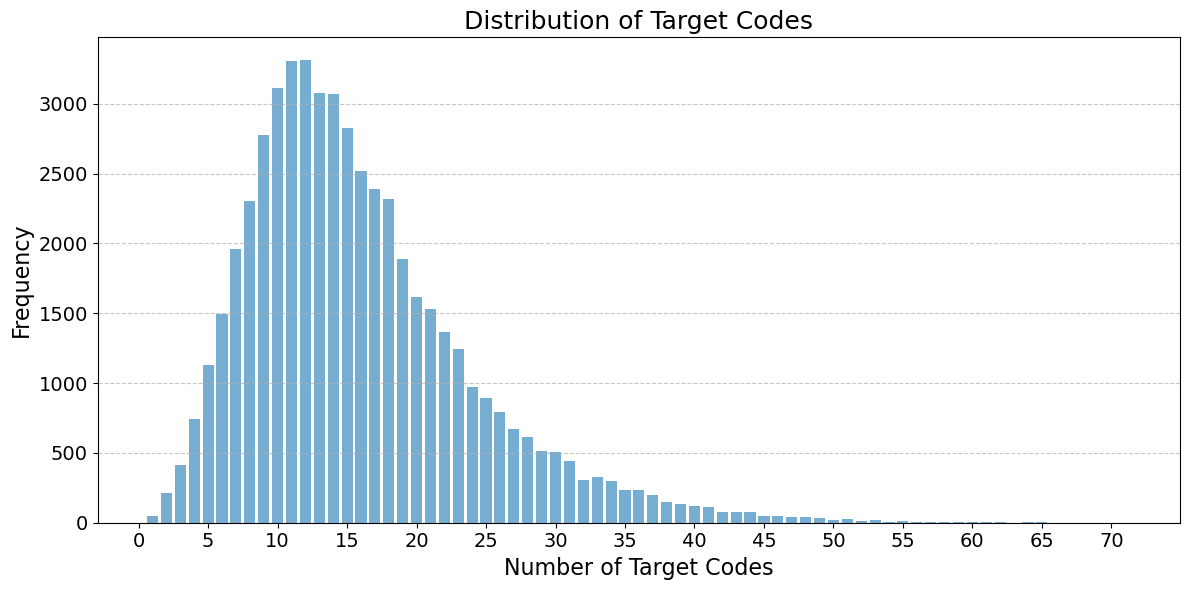

In [67]:
import matplotlib.pyplot as plt

# 提取 num_targets 列
num_targets = df['num_targets']

# 统计分布
distribution = num_targets.value_counts().sort_index()

# 确保数据按索引从小到大排序
distribution = distribution.sort_index()

plt.figure(figsize=(12, 6))
plt.bar(distribution.index, distribution.values, alpha=0.6, edgecolor=None)  # 绘制柱状图
plt.title('Distribution of Target Codes', fontsize=18)  # 设置标题
plt.xlabel('Number of Target Codes', fontsize=16)  # 设置X轴标签
plt.ylabel('Frequency', fontsize=16)  # 设置Y轴标签

# 设置X轴刻度，从0开始，每隔5个显示一个，确保正序
plt.xticks(range(0, distribution.index.max() + 1, 5), fontsize=14, rotation=0)  # 不旋转刻度

plt.yticks(fontsize=14)  # 设置Y轴刻度字体大小
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加水平网格线
plt.tight_layout()  # 自动调整布局
plt.savefig(r"C:\Users\24439\Desktop\新建文件夹 (2)\num_targets.png", dpi=900)  # 使用原始字符串
plt.show()

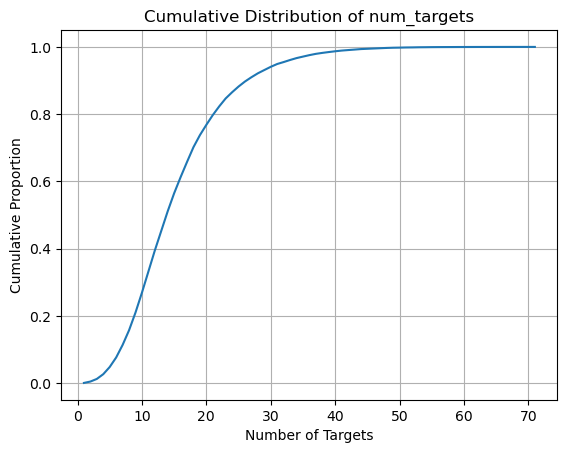

In [57]:
#编码数量的累计分布
distribution = df['num_targets'].value_counts().sort_index()
cdf = distribution.cumsum() / distribution.sum()
plt.plot(cdf.index, cdf.values)
plt.xlabel('Number of Targets')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution of num_targets')
plt.grid()
plt.show()

In [24]:
# 添加难度划分列
def assign_difficulty(num_targets):
    if num_targets <= 10:
        return "easy"
    elif 10 < num_targets <= 20:
        return "middle"
    else:
        return "hard"

# 应用划分逻辑
df['difficulty'] = df['num_targets'].apply(assign_difficulty)
print(df)
# 保存为新文件
output_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full_difficulty_from_targets.feather"
df.to_feather(output_path)

output_path


       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]  [263.9, 428.0, 425.4, 682.6, 410.71, 785.59, 0...   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]  [042, V09.0, E931.7, 041.11, 571.5, 276.3, 136...   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]  [276.6, 997.2, 285.9, V15.82, 275.3, 444.0, 40...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [428.0, 401.9, 276.5, 507.0, 431, 584.9]   
4    

'/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full_difficulty_from_targets.feather'

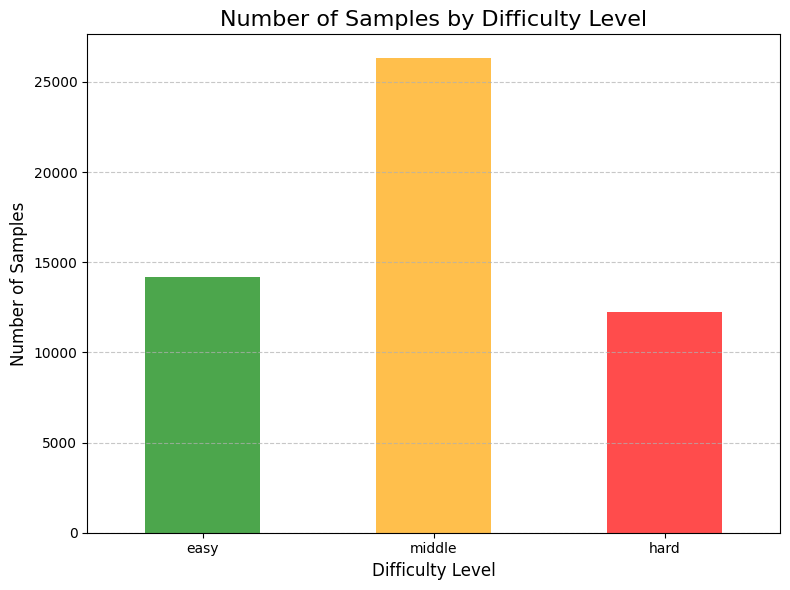

In [25]:
import matplotlib.pyplot as plt

# 确保按照 easy, middle, hard 的顺序排列
difficulty_order = ['easy', 'middle', 'hard']
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

# 绘制柱状图可视化
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Number of Samples by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()